In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#Importing Dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
#Data Reshape, for cnn we need 3D array
x_train_full = x_train_full.reshape((60000,28,28,1)) #(1 is channel, 60000 is number of items)
x_test = x_test.reshape((10000,28,28,1))

In [5]:
#Data Normalisation
x_train_n=x_train_full/255.    #Normalisisng pixel intensity
x_test_n=x_test/255.

In [6]:
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]    #0-5000 in validation set,5000-60000 in train set
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [7]:
#Model Architecture->Replicate same answer every time
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size =(3,3), strides=1,padding='valid',activation="relu",input_shape=(28,28,1)))#(width,height,channel)
model.add(keras.layers.MaxPooling2D((2,2)))          
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu")) #RELU is prefered in hidden layers in classification model
model.add(keras.layers.Dense(100,activation="relu")) #2 hidden layers, 100 and 300 are number of neurons
model.add(keras.layers.Dense(10,activation="softmax")) #Softmax activation in o/p

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [10]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [12]:
model_history = model.fit(x_train,y_train,epochs=30,batch_size=64,validation_data=(x_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 28s 32ms/step - loss: 0.8766 - accuracy: 0.6990 - val_loss: 0.7514 - val_accuracy: 0.7340
Epoch 2/30
860/860 [==============================] - 28s 32ms/step - loss: 0.5390 - accuracy: 0.8047 - val_loss: 0.4929 - val_accuracy: 0.8184
Epoch 3/30
860/860 [==============================] - 28s 33ms/step - loss: 0.4807 - accuracy: 0.8256 - val_loss: 0.9232 - val_accuracy: 0.7088
Epoch 4/30
860/860 [==============================] - 28s 32ms/step - loss: 0.4436 - accuracy: 0.8416 - val_loss: 0.4176 - val_accuracy: 0.8542
Epoch 5/30
860/860 [==============================] - 29s 33ms/step - loss: 0.4196 - accuracy: 0.8502 - val_loss: 0.4318 - val_accuracy: 0.8496
Epoch 6/30
860/860 [==============================] - 28s 33ms/step - loss: 0.3955 - accuracy: 0.8583 - val_loss: 0.3760 - val_accuracy: 0.8714
Epoch 7/30
860/860 [==============================] - 28s 33ms/step - loss: 0.3780 - accuracy: 0.8659 - val_loss: 0.4047 - val_accuracy:

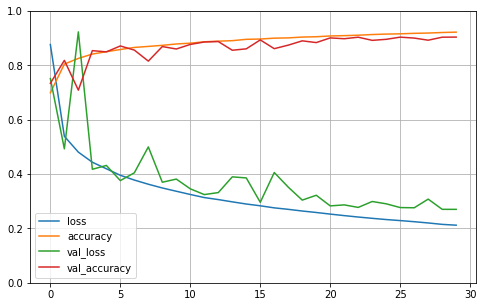

In [13]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
ev = model.evaluate(x_test_n,y_test)
ev

313/313 [==============================] - 3s 9ms/step - loss: 0.2812 - accuracy: 0.8987


[0.28120481967926025, 0.8986999988555908]

In [15]:
x_new = x_test[:3]

In [16]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


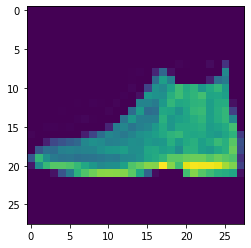

In [17]:
print(plt.imshow(x_test[0].reshape((28,28)))) #9 is equivalent to ankle boot (x_test[0])

In [18]:
keras.backend.clear_session
del model